Latihan 1


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 262, in

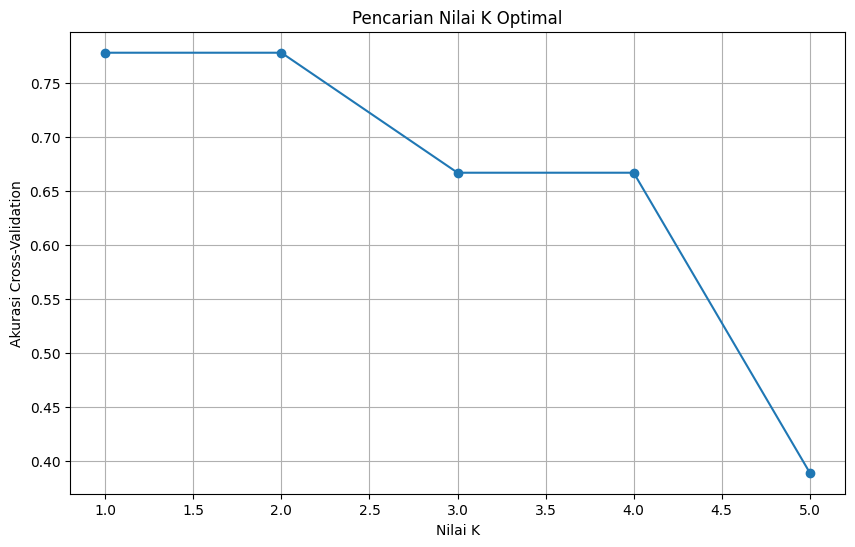

Jumlah fold yang digunakan: 3
Nilai K terbaik: 6
Akurasi terbaik: 0.7778

Prediksi untuk temperatur 16°C dan kecepatan angin 3 km/jam: Dingin

=== Perhitungan Manual dengan K=3 ===
3 tetangga terdekat:
1. Jarak: 2.24, Persepsi: Dingin
2. Jarak: 4.00, Persepsi: Panas
3. Jarak: 4.47, Persepsi: Dingin

Hasil voting: {'Panas': 1, 'Dingin': 2}
Prediksi manual dengan K=3: Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data training
data = {
    'Temperatur': [10, 25, 15, 20, 18, 20, 22, 24],
    'Kecepatan_Angin': [0, 0, 5, 3, 7, 10, 5, 6],
    'Persepsi': ['Dingin', 'Panas', 'Dingin', 'Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}

df = pd.DataFrame(data)

# Data test
test_data = {'Temperatur': [16], 'Kecepatan_Angin': [3]}

# Mencari nilai K terbaik
X = df[['Temperatur', 'Kecepatan_Angin']]
y = df['Persepsi']

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah fold yang sesuai (maksimal 3 fold karena data sedikit)
n_folds = min(3, len(X))

# Mencari K optimal dengan cross-validation
k_range = range(1, 8)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=n_folds, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot akurasi vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Pencarian Nilai K Optimal')
plt.grid(True)
plt.show()

# Menemukan K terbaik
best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Jumlah fold yang digunakan: {n_folds}")
print(f"Nilai K terbaik: {best_k}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")

# Prediksi dengan K terbaik
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_scaled, y)

# Transform data test
test_scaled = scaler.transform([[16, 3]])
prediction = knn_best.predict(test_scaled)

print(f"\nPrediksi untuk temperatur 16°C dan kecepatan angin 3 km/jam: {prediction[0]}")

# Hitung manual dengan K=3 untuk demonstrasi
print("\n=== Perhitungan Manual dengan K=3 ===")
# Hitung jarak Euclidean
test_point = np.array([16, 3])
distances = []
for i, row in df.iterrows():
    distance = np.sqrt((row['Temperatur'] - test_point[0])**2 + (row['Kecepatan_Angin'] - test_point[1])**2)
    distances.append((distance, row['Persepsi']))

# Urutkan berdasarkan jarak terdekat
distances.sort(key=lambda x: x[0])
print("3 tetangga terdekat:")
for i, (dist, persepsi) in enumerate(distances[:3]):
    print(f"{i+1}. Jarak: {dist:.2f}, Persepsi: {persepsi}")

# Voting
votes = {'Panas': 0, 'Dingin': 0}
for dist, persepsi in distances[:3]:
    votes[persepsi] += 1

print(f"\nHasil voting: {votes}")
print(f"Prediksi manual dengan K=3: {max(votes, key=votes.get)}")

Latihan 2

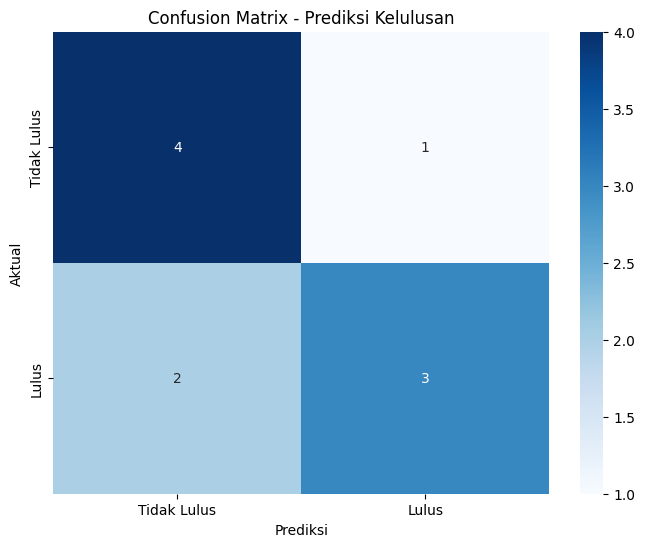

=== EVALUASI MODEL KELULUSAN ===
Confusion Matrix:
TP: 3 | FP: 1
FN: 2 | TN: 4

Akurasi: 70.00%
Presisi: 75.00%
Recall: 60.00%

Data Kelulusan:
     Nim Hasil_Sebenarnya Hasil_Prediksi
0  T1001            Lulus          Lulus
1  T1002            Lulus          Lulus
2  T1003            Lulus          Lulus
3  T1004            Lulus    Tidak Lulus
4  T1005            Lulus    Tidak Lulus
5  T1006      Tidak Lulus          Lulus
6  T1007      Tidak Lulus    Tidak Lulus
7  T1008      Tidak Lulus    Tidak Lulus
8  T1009      Tidak Lulus    Tidak Lulus
9  T1010      Tidak Lulus    Tidak Lulus


In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns

# Data kelulusan
data_kelulusan = {
    'Nim': ['T1001', 'T1002', 'T1003', 'T1004', 'T1005', 'T1006', 'T1007', 'T1008', 'T1009', 'T1010'],
    'Hasil_Sebenarnya': ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'],
    'Hasil_Prediksi': ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
}

df_kelulusan = pd.DataFrame(data_kelulusan)

# Membuat confusion matrix
y_true = df_kelulusan['Hasil_Sebenarnya']
y_pred = df_kelulusan['Hasil_Prediksi']

# Konversi ke binary (Lulus = 1, Tidak Lulus = 0)
y_true_bin = [1 if x == 'Lulus' else 0 for x in y_true]
y_pred_bin = [1 if x == 'Lulus' else 0 for x in y_pred]

# Confusion Matrix
cm = confusion_matrix(y_true_bin, y_pred_bin)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lulus', 'Lulus'],
            yticklabels=['Tidak Lulus', 'Lulus'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Prediksi Kelulusan')
plt.show()

# Menghitung metrik
accuracy = accuracy_score(y_true_bin, y_pred_bin)
precision = precision_score(y_true_bin, y_pred_bin)
recall = recall_score(y_true_bin, y_pred_bin)

print("=== EVALUASI MODEL KELULUSAN ===")
print(f"Confusion Matrix:")
print(f"TP: {cm[1,1]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TN: {cm[0,0]}")
print(f"\nAkurasi: {accuracy:.2%}")
print(f"Presisi: {precision:.2%}")
print(f"Recall: {recall:.2%}")

# Menampilkan data
print("\nData Kelulusan:")
print(df_kelulusan)

Latihan 3

Data Cuaca:
   Temperature  Humidity  Wind_Speed  Precipitation    Cloud_Cover  \
0         14.0        73         9.5           82.0  partly cloudy   
1         39.0        96         8.5           71.0  partly cloudy   
2         30.0        64         7.0           16.0          clear   
3         38.0        83         1.5           82.0          clear   
4         27.0        74        17.0           66.0       overcast   
5         32.0        55         3.5           26.0       overcast   
6         -2.0        97         8.0           86.0       overcast   
7          3.0        85         6.0           96.0  partly cloudy   
8          3.0        83         6.0           66.0       overcast   
9         28.0        74         8.5          107.0          clear   

   Atmospheric_Pressure  UV_Index  Season  Visibility  Location Weather_Type  
0               1010.82         2  Winter         3.5    inland        Rainy  
1               1011.43         7  Spring        10.0    in

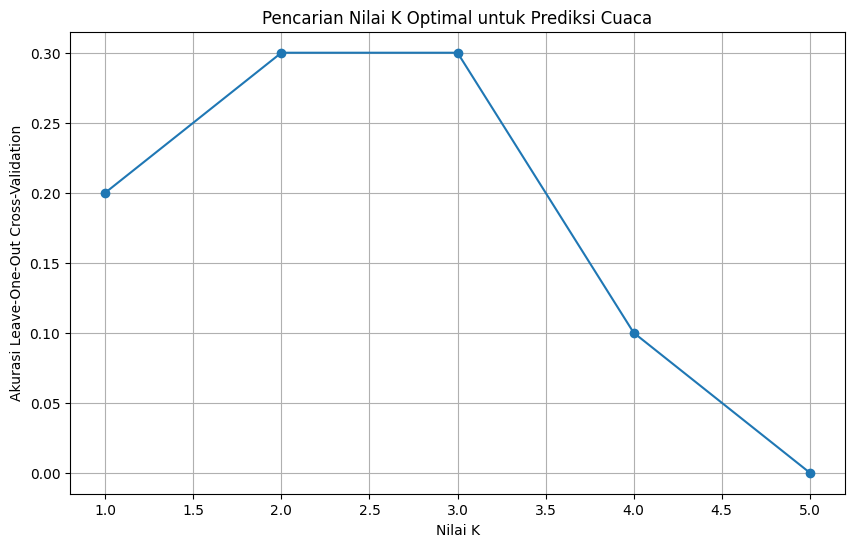

Nilai K terbaik untuk prediksi cuaca: 2
Akurasi terbaik: 0.3000

Hasil Prediksi vs Aktual:
Data 1: Prediksi=Rainy, Aktual=Rainy ✓
Data 2: Prediksi=Cloudy, Aktual=Cloudy ✓
Data 3: Prediksi=Cloudy, Aktual=Sunny ✗
Data 4: Prediksi=Cloudy, Aktual=Sunny ✗
Data 5: Prediksi=Rainy, Aktual=Rainy ✓
Data 6: Prediksi=Cloudy, Aktual=Cloudy ✓
Data 7: Prediksi=Snowy, Aktual=Snowy ✓
Data 8: Prediksi=Snowy, Aktual=Snowy ✓
Data 9: Prediksi=Rainy, Aktual=Snowy ✗
Data 10: Prediksi=Rainy, Aktual=Sunny ✗

Akurasi pada training data: 60.00%

=== Analisis Data ===
Distribusi Weather Type:
Snowy     3
Sunny     3
Cloudy    2
Rainy     2
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data cuaca
data_cuaca = {
    'Temperature': [14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0, 3.0, 28.0],
    'Humidity': [73, 96, 64, 83, 74, 55, 97, 85, 83, 74],
    'Wind_Speed': [9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 6.0, 8.5],
    'Precipitation': [82.0, 71.0, 16.0, 82.0, 66.0, 26.0, 86.0, 96.0, 66.0, 107.0],
    'Cloud_Cover': ['partly cloudy', 'partly cloudy', 'clear', 'clear', 'overcast', 'overcast', 'overcast', 'partly cloudy', 'overcast', 'clear'],
    'Atmospheric_Pressure': [1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1010.03, 990.87, 984.46, 999.44, 1012.13],
    'UV_Index': [2, 7, 5, 7, 1, 2, 1, 1, 0, 8],
    'Season': ['Winter', 'Spring', 'Spring', 'Spring', 'Winter', 'Summer', 'Winter', 'Winter', 'Winter', 'Winter'],
    'Visibility': [3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 3.5, 1.0, 7.5],
    'Location': ['inland', 'inland', 'mountain', 'coastal', 'mountain', 'inland', 'inland', 'inland', 'mountain', 'coastal'],
    'Weather_Type': ['Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Sunny']
}

df_cuaca = pd.DataFrame(data_cuaca)

print("Data Cuaca:")
print(df_cuaca)
print(f"\nShape data: {df_cuaca.shape}")

# Preprocessing data
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df_cuaca[col] = le.fit_transform(df_cuaca[col])
    label_encoders[col] = le

# Memisahkan features dan target
X = df_cuaca.drop('Weather_Type', axis=1)
y = df_cuaca['Weather_Type']

# Karena data sedikit (10 sampel), kita gunakan Leave-One-Out cross-validation
from sklearn.model_selection import LeaveOneOut

# Mencari K optimal dengan Leave-One-Out
k_range = range(1, 6)
cv_scores = []
loo = LeaveOneOut()

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = []
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)

    cv_scores.append(np.mean(scores))

# Plot hasil cross-validation
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi Leave-One-Out Cross-Validation')
plt.title('Pencarian Nilai K Optimal untuk Prediksi Cuaca')
plt.grid(True)
plt.show()

# Nilai K terbaik
best_k_cuaca = k_range[np.argmax(cv_scores)]
print(f"Nilai K terbaik untuk prediksi cuaca: {best_k_cuaca}")
print(f"Akurasi terbaik: {max(cv_scores):.4f}")

# Training model dengan K terbaik menggunakan semua data
knn_cuaca = KNeighborsClassifier(n_neighbors=best_k_cuaca)
knn_cuaca.fit(X, y)

# Prediksi untuk semua data (hanya untuk demonstrasi)
predictions = knn_cuaca.predict(X)

# Decode predictions
weather_types_decoded = label_encoders['Weather_Type'].inverse_transform(predictions)
actual_weather_decoded = label_encoders['Weather_Type'].inverse_transform(y)

print("\nHasil Prediksi vs Aktual:")
for i, (pred, actual) in enumerate(zip(weather_types_decoded, actual_weather_decoded)):
    status = "✓" if pred == actual else "✗"
    print(f"Data {i+1}: Prediksi={pred}, Aktual={actual} {status}")

# Akurasi pada training data
accuracy_train = accuracy_score(y, predictions)
print(f"\nAkurasi pada training data: {accuracy_train:.2%}")

# Analisis feature importance sederhana
print("\n=== Analisis Data ===")
print("Distribusi Weather Type:")
print(pd.Series(actual_weather_decoded).value_counts())